Подготовить данные для этапа моделирования (обучения)
    
1. [x] Анализ данных, необходимые корректировки.
При обработке пропусков/выбросов/скалировании тестовую и тренировачную выборку обрабатывать отдельно.
2. [x] Разделите данные на тренировачную и тестовую выборку.
3. [x] Обработать пропуски.
4. [x] Оценить выбросы.
5. [x] Корреляция.
6. [x] Тест на нормальность распределения.
7. [-] Масштабировать и стандартизировать данные.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

In [4]:
uploaded = files.upload()
#загрузка файла с компьютера


Saving credit_train.csv to credit_train.csv


In [25]:
# Загрузка файла в DataFrame
df=pd.read_csv('credit_train.csv', encoding='cp1251', sep=';')

1. Aнализ данных, необходимые корректировки.

In [6]:
df

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,NaN,NaN,UMN,"59998,00",10,1.60,NaN,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,2,F,NaN,MAR,UMN,"10889,00",6,1.10,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,3,M,32.0,MAR,SPC,"10728,00",12,1.10,NaN,NaN,ОБЛ САРАТОВСКАЯ,NaN,5.0,0.0,0
3,4,F,27.0,NaN,SPC,"12009,09",12,1.10,NaN,NaN,ОБЛ ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,5,M,45.0,NaN,SPC,NaN,10,1.10,"0,421385",SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,NaN,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170741,170742,F,27.0,UNM,SPC,"64867,00",12,1.10,"0,535257",GRD,РЕСПУБЛИКА ТАТАРСТАН,40000.0,6.0,0.0,0
170742,170743,F,24.0,MAR,SPC,"17640,00",6,1.60,"0,573287",SCH,САНКТ-ПЕТЕРБУРГ Г,30000.0,1.0,0.0,0
170743,170744,F,31.0,UNM,SPC,"27556,47",10,1.32,"0,416098",GRD,ПРИМОРСКИЙ КРАЙ,40000.0,1.0,0.0,0
170744,170745,F,53.0,DIV,PNA,"6189,00",12,1.10,"0,482595",SCH,ПЕНЗЕНСКАЯ ОБЛ,31000.0,2.0,0.0,0


In [26]:
# Общая информация о данных в таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170746 non-null  int64  
 1   gender                170746 non-null  object 
 2   age                   170743 non-null  float64
 3   marital_status        170743 non-null  object 
 4   job_position          170746 non-null  object 
 5   credit_sum            170744 non-null  object 
 6   credit_month          170746 non-null  int64  
 7   tariff_id             170746 non-null  float64
 8   score_shk             170739 non-null  object 
 9   education             170741 non-null  object 
 10  living_region         170554 non-null  object 
 11  monthly_income        170741 non-null  float64
 12  credit_count          161516 non-null  float64
 13  overdue_credit_count  161516 non-null  float64
 14  open_account_flg      170746 non-null  int64  
dtype

In [27]:
# Статистическое описание данных
df.describe()

,client_id,age,credit_month,tariff_id,monthly_income,credit_count,overdue_credit_count,open_account_flg
count,170746.000000,170743.000000,170746.000000,170746.000000,170741.000000,161516.000000,161516.000000,170746.000000
mean,85373.500000,36.497262,10.980749,1.323900,40138.596149,2.107308,0.046070,0.176028
std,49290.268869,10.546044,3.536698,0.235813,25044.373992,1.777128,0.211548,0.380845
min,1.000000,18.000000,3.000000,1.000000,5000.000000,0.000000,0.000000,0.000000
25%,42687.250000,28.000000,10.000000,1.100000,25000.000000,1.000000,0.000000,0.000000
50%,85373.500000,34.000000,10.000000,1.320000,35000.000000,2.000000,0.000000,0.000000
75%,128059.750000,43.000000,12.000000,1.600000,50000.000000,3.000000,0.000000,0.000000
max,170746.000000,71.000000,36.000000,1.960000,950000.000000,21.000000,3.000000,1.000000


In [36]:
# Преобразование 'credit_sum' в числовой формат
df['credit_sum'] = df['credit_sum'].str.replace(',', '.').astype(float)

In [37]:
df.dtypes

client_id                 int64
gender                   object
age                     float64
marital_status           object
job_position             object
credit_sum              float64
credit_month              int64
tariff_id               float64
score_shk                object
education                object
living_region            object
monthly_income          float64
credit_count            float64
overdue_credit_count    float64
open_account_flg          int64
dtype: object

In [38]:
#хот-фикс, удалила строчки где в возрасле NAN так как дальше возникала ошибка которую не смогла решить
df = df.dropna(subset=['age'])
df = df.dropna(subset=['credit_sum'])

In [39]:
# Проверка наличия пропущенных значений
df.isna().sum()

client_id                  0
gender                     0
age                        0
marital_status             1
job_position               0
credit_sum                 0
credit_month               0
tariff_id                  0
score_shk                  4
education                  4
living_region            192
monthly_income             3
credit_count            9230
overdue_credit_count    9230
open_account_flg           0
dtype: int64

In [40]:
# Проверка наличия дубликатов
df.duplicated().sum()

0

In [41]:
# Проверка, есть ли строки, в которых все ячейки пустые
empty_rows = df.isnull().all(axis=1)
print(empty_rows.sum())

0


2. Разделение на тестовую и тренинг выборки

In [42]:
X = df[['age','credit_sum', 'overdue_credit_count', 'credit_count', 'monthly_income']]
Y = df['open_account_flg'] #целевая переменная

In [43]:
#Разделяем выборку на тренинговую и тестовую используя sklearn
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [44]:
X_train.dtypes

age                     float64
credit_sum              float64
overdue_credit_count    float64
credit_count            float64
monthly_income          float64
dtype: object

In [45]:
#Проверяем наличие пропусков в выборке train
X_train.isna().sum()

age                        0
credit_sum                 0
overdue_credit_count    6077
credit_count            6077
monthly_income             1
dtype: int64

In [46]:
#Проверяем наличие пропусков в выборке test
X_test.isna().sum()

age                        0
credit_sum                 0
overdue_credit_count    3153
credit_count            3153
monthly_income             2
dtype: int64

3. Обработка пропусков

In [47]:

#X_train['age'] = X_train['age'].apply(lambda x: X_train['age'].median() if pd.isnull(x) else x)
#X_test['age'] = X_test['age'].apply(lambda x: X_test['age'].median() if pd.isnull(x) else x)

X_train['overdue_credit_count'] = X_train['overdue_credit_count'].apply(lambda x: 0 if pd.isnull(x) else x)
X_test['overdue_credit_count'] = X_test['overdue_credit_count'].apply(lambda x: 0 if pd.isnull(x) else x)

X_train['credit_count'] = X_train['credit_count'].apply(lambda x: 0 if pd.isnull(x) else x)
X_test['credit_count'] = X_test['credit_count'].apply(lambda x: 0 if pd.isnull(x) else x)

#X_train['credit_sum'] = X_train['credit_sum'].apply(lambda x: 0 if pd.isnull(x) else x)
#X_test['credit_sum'] = X_test['credit_sum'].apply(lambda x: 0 if pd.isnull(x) else x)

X_train['monthly_income'] = X_train['monthly_income'].apply(lambda x: 0 if pd.isnull(x) else x)
X_test['monthly_income'] = X_test['monthly_income'].apply(lambda x: 0 if pd.isnull(x) else x)

In [48]:
X_train.isna().sum()

age                     0
credit_sum              0
overdue_credit_count    0
credit_count            0
monthly_income          0
dtype: int64

In [49]:
X_test.isna().sum()

age                     0
credit_sum              0
overdue_credit_count    0
credit_count            0
monthly_income          0
dtype: int64

In [24]:
print(X_train.dtypes)

age                     float64
credit_sum               object
overdue_credit_count    float64
credit_count            float64
monthly_income          float64
dtype: object


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Инициализация и обучение модели (логистическая регрессия)
model = LogisticRegression(random_state=42)
model.fit(X_train, Y_train)

# Предсказание на тестовом наборе данных
predictions = model.predict(X_test)

# Оценка точности
accuracy = accuracy_score(Y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8239950306149614


4. Оценка выборосов

<Axes: >

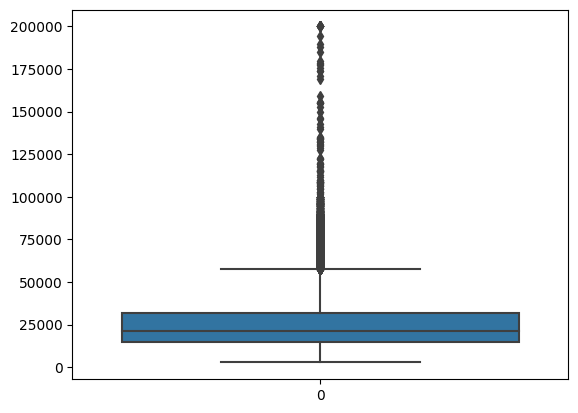

In [38]:
#не нашла других подходящих столбцов для оценки выбросов
df['credit_sum'] = df['credit_sum'].str.replace(',', '.').astype(float)
sns.boxplot(data=df['credit_sum'])

<Axes: >

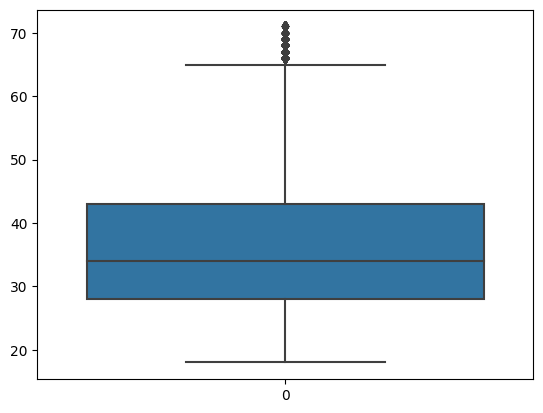

In [39]:
sns.boxplot(data=df['age'])

5. Корреляция

In [52]:
# Рассчет корреляции Пирсона
correlation_matrix = df.corr(method='pearson')

# Вывод матрицы корреляции
print(correlation_matrix)

                      client_id       age  credit_sum  credit_month  \
client_id              1.000000 -0.000764   -0.001445     -0.000027   
age                   -0.000764  1.000000   -0.096612      0.007098   
credit_sum            -0.001445 -0.096612    1.000000      0.228322   
credit_month          -0.000027  0.007098    0.228322      1.000000   
tariff_id             -0.000049 -0.109293    0.090654     -0.056403   
monthly_income        -0.001284 -0.014885    0.351497      0.007657   
credit_count           0.001916  0.116666    0.015818      0.050424   
overdue_credit_count  -0.005221  0.007789   -0.003828      0.006477   
open_account_flg       0.000254 -0.031062   -0.072038      0.025803   

                      tariff_id  monthly_income  credit_count  \
client_id             -0.000049       -0.001284      0.001916   
age                   -0.109293       -0.014885      0.116666   
credit_sum             0.090654        0.351497      0.015818   
credit_month          -0.0564

<ipython-input-52-c837aa6d0f7e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


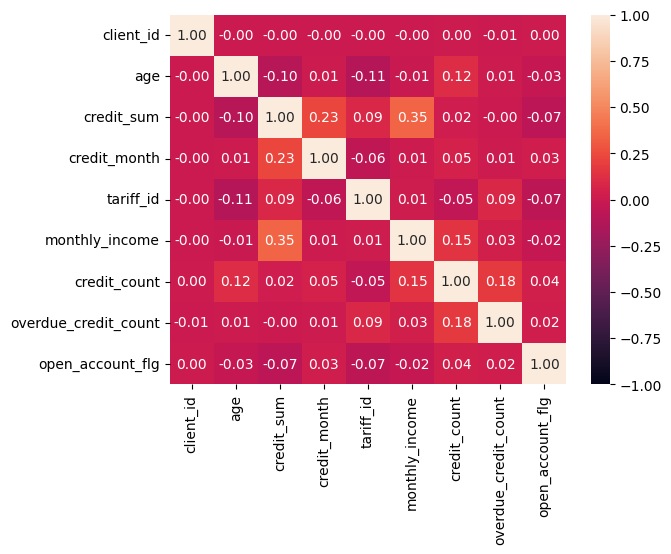

In [53]:
# Построение тепловой карты
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, fmt=".2f")
#annot=True аннотации с числовыми значениями, fmt=".2f" форматирует числа с двумя знаками после запятой

plt.show()

6. Teст на нормальность распределения

In [55]:
# Используем тест Шапиро-Уилка
from scipy.stats import shapiro

statistic, p_value = shapiro(df['credit_sum'])
print(f'Statistic: {statistic}, p-value: {p_value}')

# Проверка нулевой гипотезы о нормальности
alpha = 0.05
if p_value > alpha:
    print("Распределение похоже на нормальное (не отвергаем нулевую гипотезу)")
else:
    print("Распределение не является нормальным (отвергаем нулевую гипотезу)")

Statistic: 0.8766692876815796, p-value: 0.0
Распределение не является нормальным (отвергаем нулевую гипотезу)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [56]:
X_train_scaled = (X_train - X_train.min()) / (X_train.max() - X_train.min())

# Вывод результатов
print("Исходные данные:")
print(X_train)
print("\nМасштабированные данные (Min-Max Scaling):")
print(X_train_scaled)

Исходные данные:
         age  credit_sum  overdue_credit_count  credit_count  monthly_income
118284  24.0    59990.00                   0.0           0.0         33000.0
27702   24.0    12591.00                   0.0           0.0         30000.0
70955   27.0    13980.00                   0.0           3.0         35000.0
71772   22.0    40799.00                   0.0           0.0         30000.0
75777   41.0     7178.89                   0.0           0.0         30000.0
...      ...         ...                   ...           ...             ...
119883  40.0    19450.00                   0.0           3.0         30000.0
103698  20.0     9702.00                   0.0           0.0          8500.0
131936  36.0     8461.00                   0.0           5.0        100000.0
146871  37.0    30990.00                   0.0           4.0         40000.0
121962  29.0    13818.00                   0.0           2.0         75000.0

[114397 rows x 5 columns]

Масштабированные данные (Min-Ma

In [57]:
# Z-Score Standardization
df_standardized = (df - df.mean()) / df.std()

# Вывод результатов
print("Исходные данные:")
print(df)
print("\nСтандартизированные данные (Z-Score Standardization):")
print(df_standardized)

<ipython-input-57-28163a61fc94>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_standardized = (df - df.mean()) / df.std()


Исходные данные:
        client_id gender   age marital_status job_position  credit_sum  \
2               3      M  32.0            MAR          SPC    10728.00   
3               4      F  27.0            NaN          SPC    12009.09   
6               7      M  34.0            MAR          SPC    10317.00   
7               8      F  26.0            UNM          SPC    47878.00   
8               9      M  23.0            UNM          SPC    37577.16   
...           ...    ...   ...            ...          ...         ...   
170741     170742      F  27.0            UNM          SPC    64867.00   
170742     170743      F  24.0            MAR          SPC    17640.00   
170743     170744      F  31.0            UNM          SPC    27556.47   
170744     170745      F  53.0            DIV          PNA     6189.00   
170745     170746      M  49.0            MAR          SPC    12787.00   

        credit_month  tariff_id score_shk education  \
2                 12       1.10       N

<ipython-input-57-28163a61fc94>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_standardized = (df - df.mean()) / df.std()
